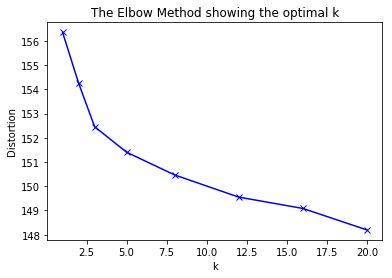

In [52]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

docWords=np.load("science2k-doc-word.npy")
distortions = []
K=[1,2,3,5,8,12,16,20]
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(docWords)
    distortions.append(sum(np.min(cdist(docWords, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / docWords.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

According to the elbow method, we choose k = 3

In [79]:
from sklearn.metrics import pairwise_distances
kmeanModel = KMeans(n_clusters=3).fit(docWords)
dists = pairwise_distances(kmeanModel.cluster_centers_, docWords)
closest = [ sorted(range(len(dist)), key=lambda i: dist[i] if kmeanModel.labels_[i] == index else 99999)[:10] for index, dist in enumerate(dists)]
print(closest)

[[997, 968, 541, 1314, 983, 767, 370, 704, 1000, 1032], [1281, 139, 1283, 724, 587, 797, 1227, 715, 159, 1359], [519, 574, 453, 499, 0, 90, 122, 123, 124, 777]]


In [71]:
f = open('science2k-titles.txt')
titles=[]
for line in f: titles.append(line)
# print(titles)
for i in closest[2]:
    print(titles[i])

"Requirement of NAD and SIR2 for Life-Span Extension by Calorie Restriction in Saccharomyces Cerevisiae"

"Suppression of Mutations in Mitochondrial DNA by tRNAs Imported from the Cytoplasm"

"Distinct Classes of Yeast Promoters Revealed by Differential TAF Recruitment"

"Efficient Initiation of HCV RNA Replication in Cell Culture"

"Ubiquitination: More Than Two to Tango"

"Negative Regulation of the SHATTERPROOF Genes by FRUITFULL during Arabidopsis Fruit Development"

"T Cell-Independent Rescue of B Lymphocytes from Peripheral Immune Tolerance"

"Reduced Food Intake and Body Weight in Mice Treated with Fatty Acid Synthase Inhibitors"

"Patterning of the Zebrafish Retina by a Wave of Sonic Hedgehog Activity"

"Active Remodeling of Somatic Nuclei in Egg Cytoplasm by the Nucleosomal ATPase ISWI"



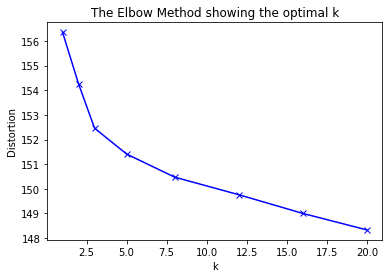

In [82]:
wordDocs=np.load("science2k-word-doc.npy")
distortions = []
K=[1,2,3,5,8,12,16,20]
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(docWords)
    distortions.append(sum(np.min(cdist(docWords, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / docWords.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

According to the elbow method, we choose k = 3